# Export surf temps for Alex Ayet
Take diablo output and make netcdf for Alex Ayet

In [45]:
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import h5py
import numpy as np
import scipy.integrate as integrate
import cmocean.cm as cmo
import matplotlib.patches as patches
import xarray as xr
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16
plt.rcParams['contour.negative_linestyle'] = 'solid'

In [46]:
####### MLI ########
filename = '/data/pacific/jacob/MABLTKEPROP/movie.h5'
f_mli = h5py.File(filename,'r')

fm_mli = h5py.File('/data/pacific/jacob/MABLTKEPROP/mean.h5', 'r')
time = fm_mli['time']
time = np.array([x[0] for x in time.values()])
x = np.linspace(0, 10000, 1024)
gyf = fm_mli['gyf']
y = gyf['0001'][:]

days_mli = time/86400
print(f'MLI simulation days: {days_mli[-1]}')

MLI simulation days: 7.0449798848800045


In [47]:
btoT = (9.8*4e-5)**(-1)
thv_xz = f_mli['th1_xz']
temp = np.array([x for x in thv_xz.values()])

In [48]:
pert_temp = btoT*temp
back_temp = btoT*3e-8*x
full_temp = pert_temp+back_temp

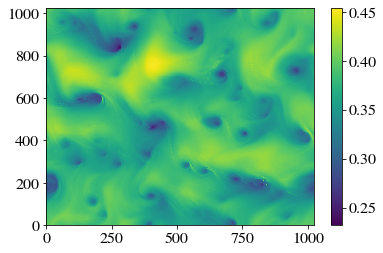

In [49]:
plt.pcolormesh(pert_temp[-1,:,:])
plt.colorbar()

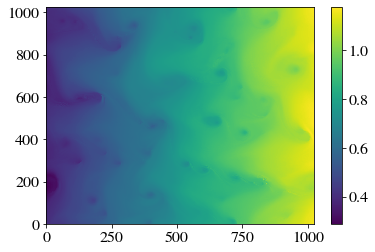

In [51]:
plt.pcolormesh(full_temp[-1,:,:])
plt.colorbar()

In [52]:
da = xr.Dataset(
    {
   'pert_temp':(['time', 'x', 'y'], pert_temp),
    'full_temp':(['time', 'x','y'], full_temp),
    },
    coords={
        'x': (['x'], x),
        'y': (['y'], x),
        'time': (['time'], time),
    }
)

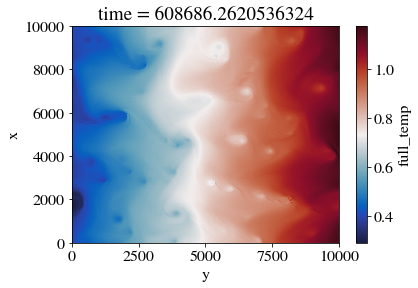

In [54]:
da.full_temp.isel(time=-1).plot(cmap=cmo.balance)

In [55]:
da.to_netcdf('/data/pacific/jacob/MABLTKEPROP/surf_temps.nc')

In [56]:
btoT*3e-8

7.653061224489794e-05